          country officialname officialsurname    shortname jerseynumber  \
0         Austria       Daniel        Bachmann     Bachmann         13.0   
1         Austria      Andreas           Ulmer        Ulmer          2.0   
2         Austria   Aleksandar        Dragovic     Dragovic          3.0   
3         Austria       Martin     Hinteregger  Hinteregger          4.0   
4         Austria        David           Alaba        Alaba          8.0   
...           ...          ...             ...          ...          ...   
3359        Italy        Tomáš          Jensen        James          1.0   
3360  Switzerland      Stephan           Meyer        James          1.0   
3361        Italy        Tomáš          Jensen        James          1.0   
3362  Switzerland      Nicolas         Mathieu        James          1.0   
3363  Switzerland  Jean-Benoit       Schüpbach        James          1.0   

     isgoalkeeper   jerseyname iscaptain numorder  tacticx  tacticy  
0            True

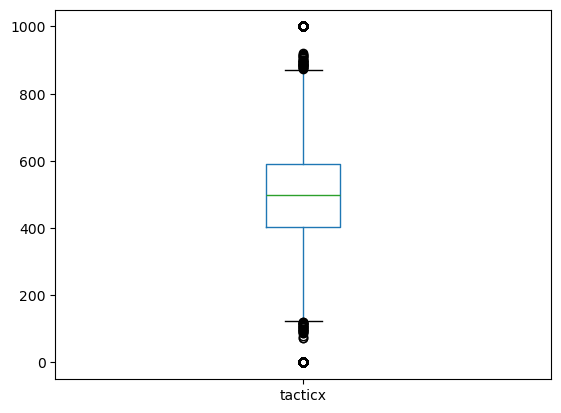

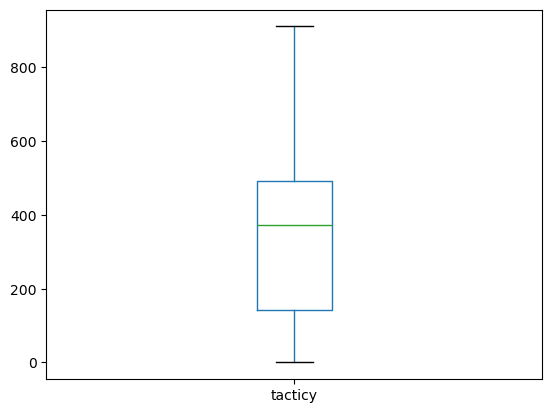

853
   country officialname officialsurname    shortname jerseynumber  \
0  Austria       Daniel        Bachmann     Bachmann         13.0   
1  Austria      Andreas           Ulmer        Ulmer          2.0   
2  Austria   Aleksandar        Dragovic     Dragovic          3.0   
3  Austria       Martin     Hinteregger  Hinteregger          4.0   
4  Austria        David           Alaba        Alaba          8.0   

  isgoalkeeper   jerseyname iscaptain numorder  tacticx  tacticy  
0         True     Bachmann     False      1.0    150.0    504.0  
1        False        Ulmer     False      2.0    562.0    153.0  
2        False     Dragovic     False      3.0    345.0    737.0  
3        False  Hinteregger     False      4.0    370.0    317.0  
4        False        Alaba      True      5.0    328.0    455.0  


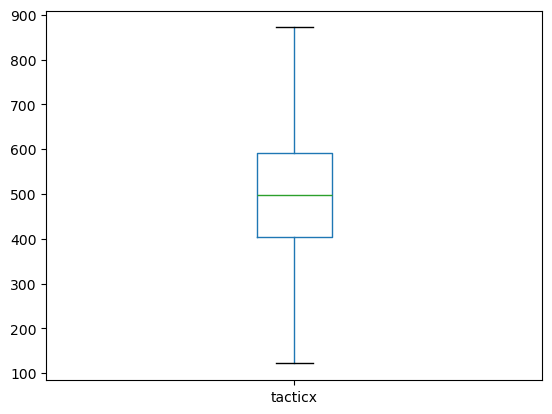

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr

df=pd.read_csv("C:\\Users\\Garimidi Siva Sree\\TunisiaLocalChapter_UEFAEURO2024\Datasets\\match_line_ups.csv")
df.isnull().mean()*100
#Deleting column with 100% missing values
df.drop('isbooked', axis=1)
df.head
df.nunique()
# Columns with missing values
columns_with_missing = ['country', 'officialname', 'officialsurname', 'shortname', 'jerseynumber', 'isgoalkeeper', 'jerseyname', 'iscaptain', 'numorder']
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(df[columns_with_missing]), columns=columns_with_missing)

# Applying median imputation for tacticx and tacticy
median_imputer = SimpleImputer(strategy='median')
columns_for_median_imputation = ['tacticx', 'tacticy']
df_median_imputed = pd.DataFrame(median_imputer.fit_transform(df[columns_for_median_imputation]), columns=columns_for_median_imputation)

# Combine the imputed columns back into the original DataFrame
df_imputed = pd.concat([df_mode_imputed, df_median_imputed], axis=1)
print(df_imputed)
df_imputed.describe()
#define a function called plot_boxplot
def plot_boxplot(df,ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df_imputed, "tacticx")
plot_boxplot(df_imputed, "tacticy")

#define a function called outliers, which return the list of indices of outliers

def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    global lower_bound, upper_bound
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls= df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    return ls

#create an empty list to store the output indices of multiple columns
index_list=[]
for feature in ['tacticx','tacticy']:
    index_list.extend(outliers(df_imputed,feature))

index_list
Number_outliers=len(index_list)
print(Number_outliers)

#Since the number of outliers are large, we shall do a capping
new_df=df_imputed.copy()
def capping(df, f1):
    Q1 = df[f1].quantile(0.25)
    Q3 = df[f1].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f1] = np.where(df[f1] > upper_bound, upper_bound,
                      np.where(df[f1] < lower_bound, lower_bound, df[f1]))
    return df[f1]  # Return the modified column

# Apply capping to 'tacticx' column in df_imputed
new_df = df_imputed.copy()
new_df['tacticx'] = capping(new_df, 'tacticx')
new_df.to_csv("C:\\Users\\Garimidi Siva Sree\\TunisiaLocalChapter_UEFAEURO2024\\task2-data-analysis\\newmatchlineups.csv")
# Print the first few rows of new_df to verify
print(new_df.head())

# Plot boxplot after capping
plot_boxplot(new_df, "tacticx")

In [22]:
new_df.nunique() 

country             28
officialname       524
officialsurname    817
shortname          606
jerseynumber        26
isgoalkeeper         2
jerseyname         604
iscaptain            2
numorder            23
tacticx            489
tacticy            633
dtype: int64

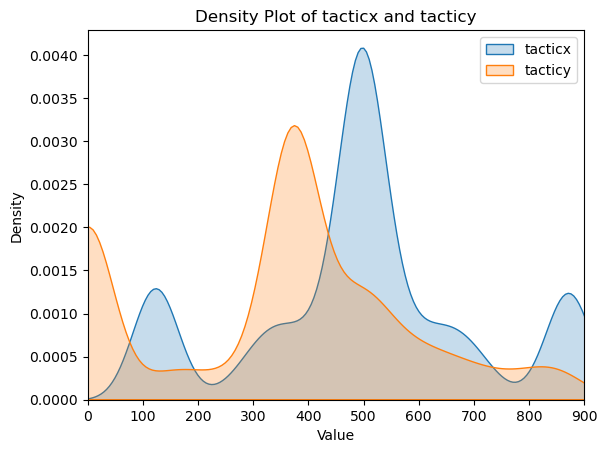

In [23]:

# Plotting density plot for each variable separately
sns.kdeplot(new_df['tacticx'], label='tacticx', fill=True)
sns.kdeplot(new_df['tacticy'], label='tacticy', fill=True)

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of tacticx and tacticy')

# Display the plot
plt.legend()# Set x-axis limits (xlim)
plt.xlim(0, 900)  # Adjust the limits as per your data range

plt.show()

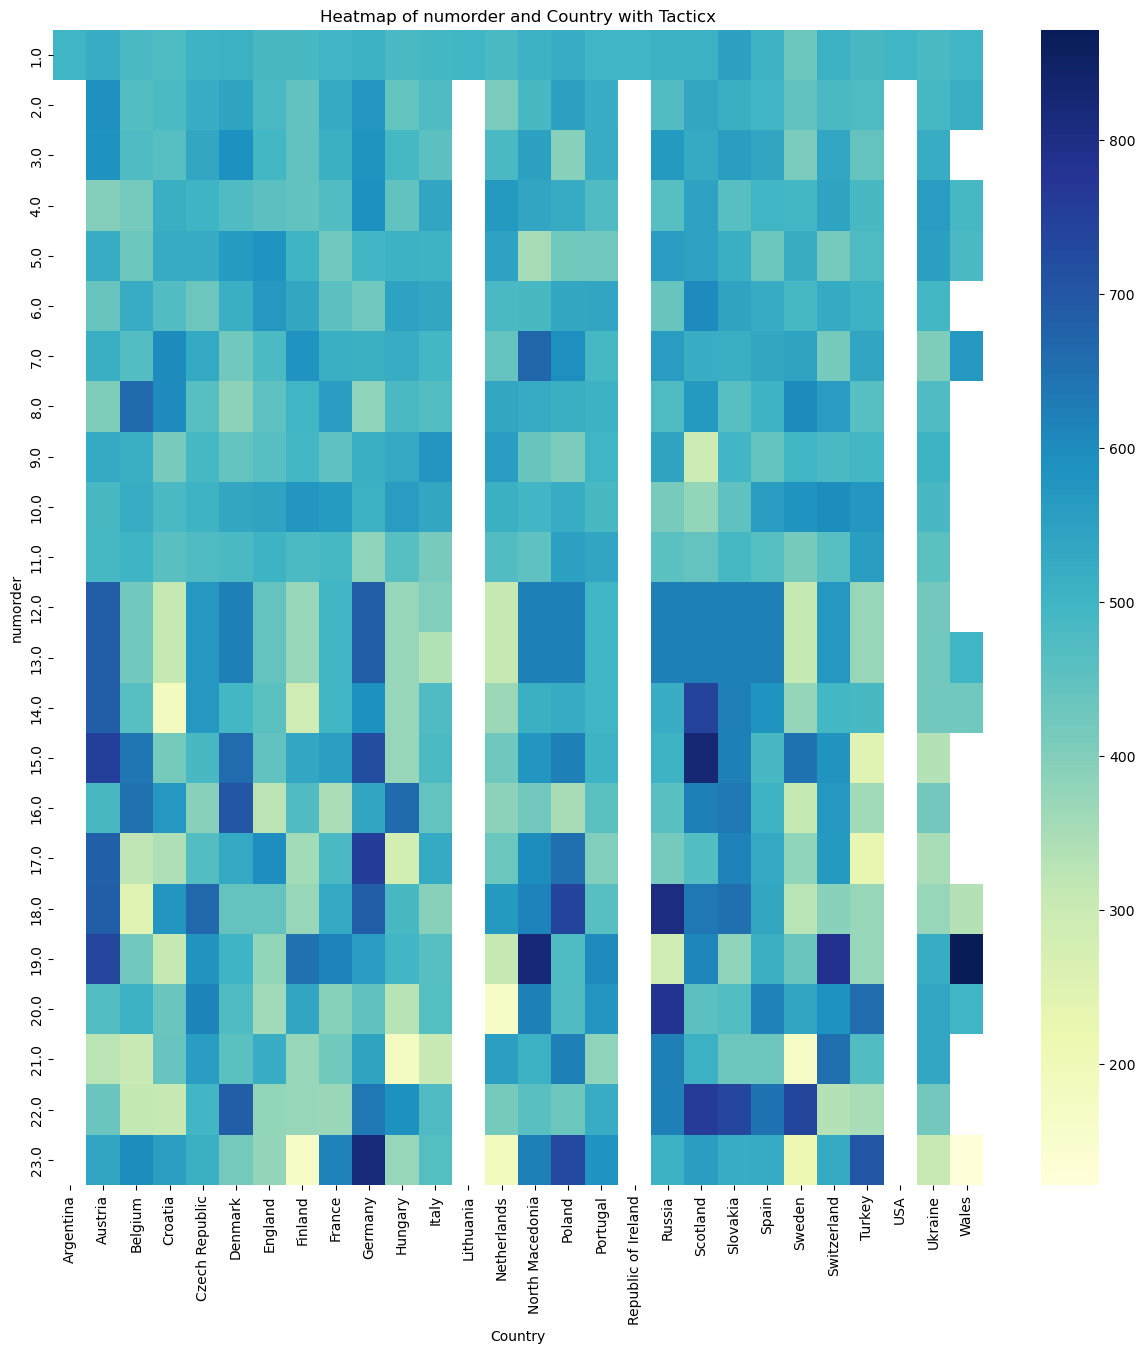

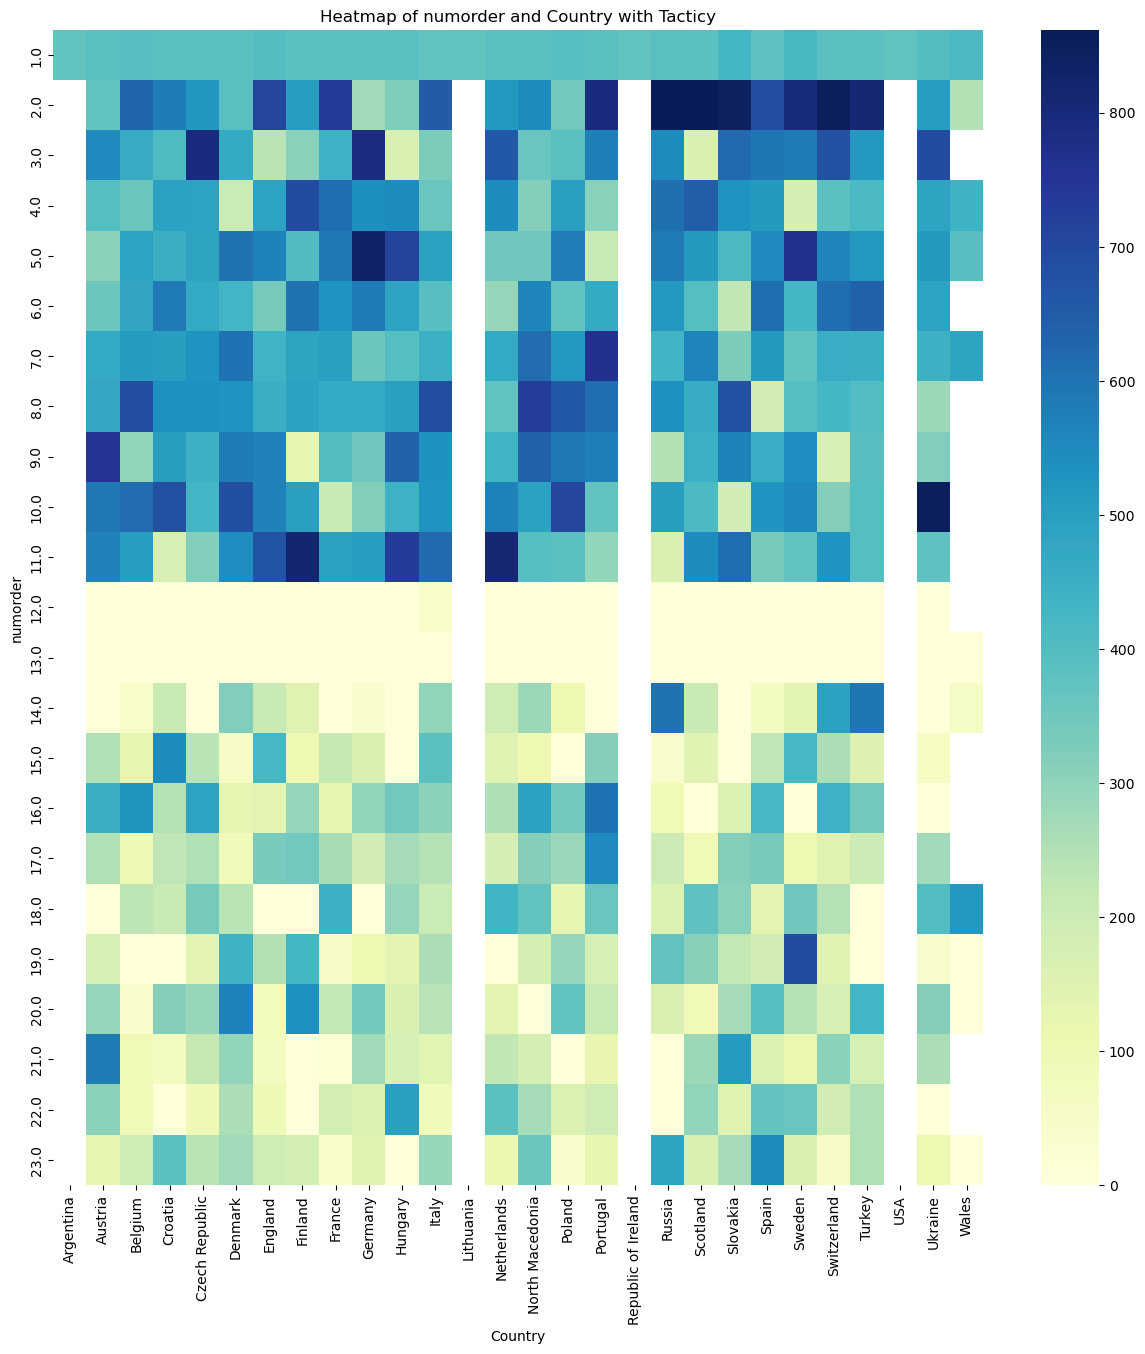

In [24]:

pivot_df = new_df.pivot_table(index='numorder', columns='country', values='tacticx')
plt.figure(figsize=(15, 15))
# Plotting heatmap
sns.heatmap(data=pivot_df, annot=False, cmap='YlGnBu')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('numorder')
plt.title('Heatmap of numorder and Country with Tacticx')
plt.show()

pivot_df = new_df.pivot_table(index='numorder', columns='country', values='tacticy')
plt.figure(figsize=(15,15))
# Plotting heatmap
sns.heatmap(data=pivot_df, annot=False, cmap='YlGnBu')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('numorder')
plt.title('Heatmap of numorder and Country with Tacticy')

# Show plot
plt.show()

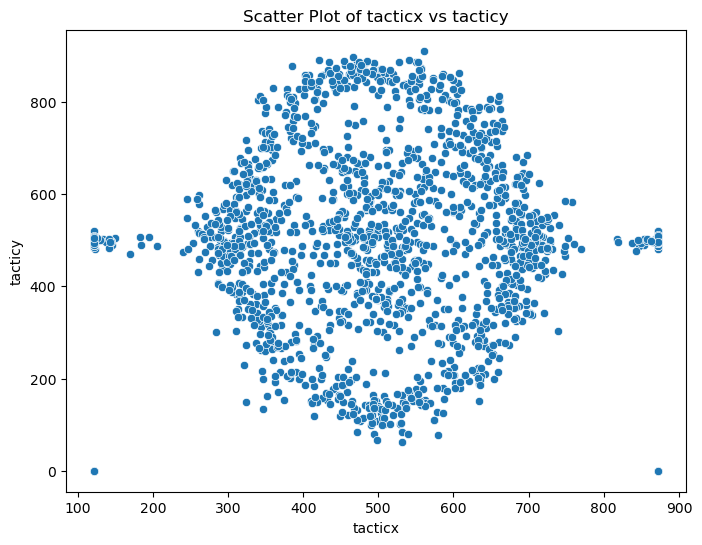

tacticx vs tacticy: correlation = 0.01893508032629572, p-value = 0.2722372709175068
tacticx vs numorder: correlation = -0.01782789169706546, p-value = 0.3012691482853027
tacticx vs iscaptain: correlation = 0.01121731480964918, p-value = 0.5154449036746632
tacticx vs isgoalkeeper: correlation = 0.00017270969617914217, p-value = 0.9920105646383792
tacticy vs numorder: correlation = -0.3814578821841912, p-value = 5.698355722190361e-117
tacticy vs iscaptain: correlation = 0.1043169518337799, p-value = 1.3221110501478521e-09
tacticy vs isgoalkeeper: correlation = -0.23425201711841462, p-value = 3.672209271511959e-43
numorder vs iscaptain: correlation = -0.07952092920997955, p-value = 3.878040643985137e-06
numorder vs isgoalkeeper: correlation = -0.0005150634610274806, p-value = 0.9761766491118845
iscaptain vs isgoalkeeper: correlation = -0.007534608858299614, p-value = 0.6622193354629589


In [25]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tacticx', y='tacticy', data = new_df)
plt.title('Scatter Plot of tacticx vs tacticy')
plt.xlabel('tacticx')
plt.ylabel('tacticy')
plt.show()

#calculating pearson correlation coefficient for tacticx,tacticy, numorder,iscaptain and isgoalkeeper
variables= ['tacticx', 'tacticy', 'numorder', 'iscaptain', 'isgoalkeeper']
# Calculate correlation coefficients and p-values for the specified variables
results = {}
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        corr, p_value = pearsonr(new_df[var1], new_df[var2])
        results[f"{var1} vs {var2}"] = {'correlation': corr, 'p-value': p_value}

# Print the results
for key, value in results.items():
    print(f"{key}: correlation = {value['correlation']}, p-value = {value['p-value']}")




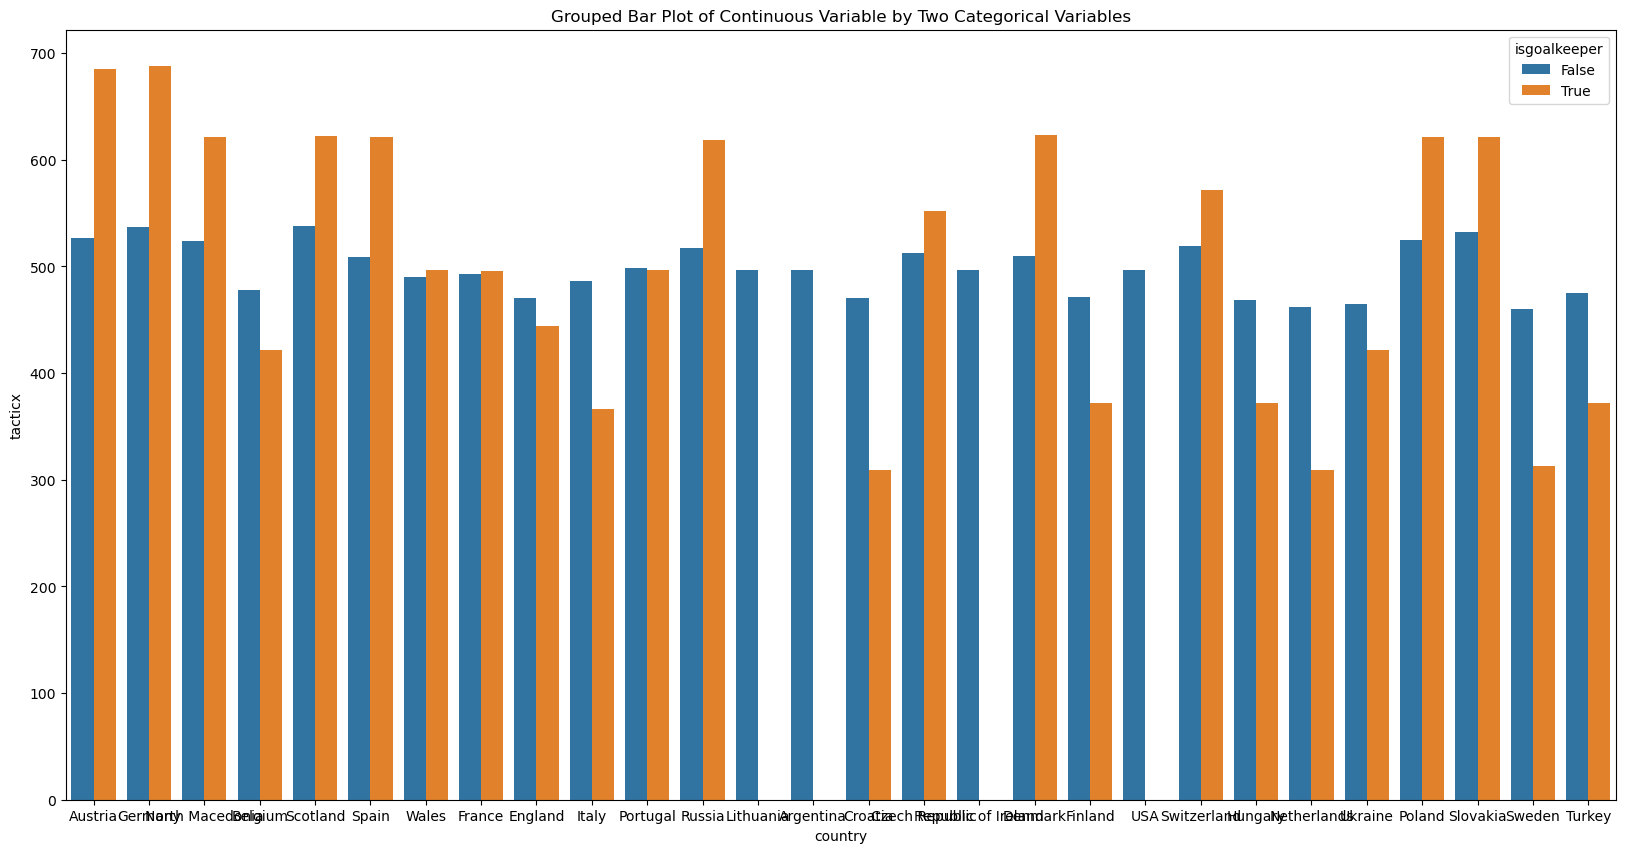

In [26]:
plt.figure(figsize=(20, 10))
sns.barplot(x='country', y='tacticx', hue='isgoalkeeper', data=new_df, errorbar=None)
plt.title('Grouped Bar Plot of Continuous Variable by Two Categorical Variables')
plt.xlabel('country')
plt.ylabel('tacticx')
plt.legend(title='isgoalkeeper')
plt.show()

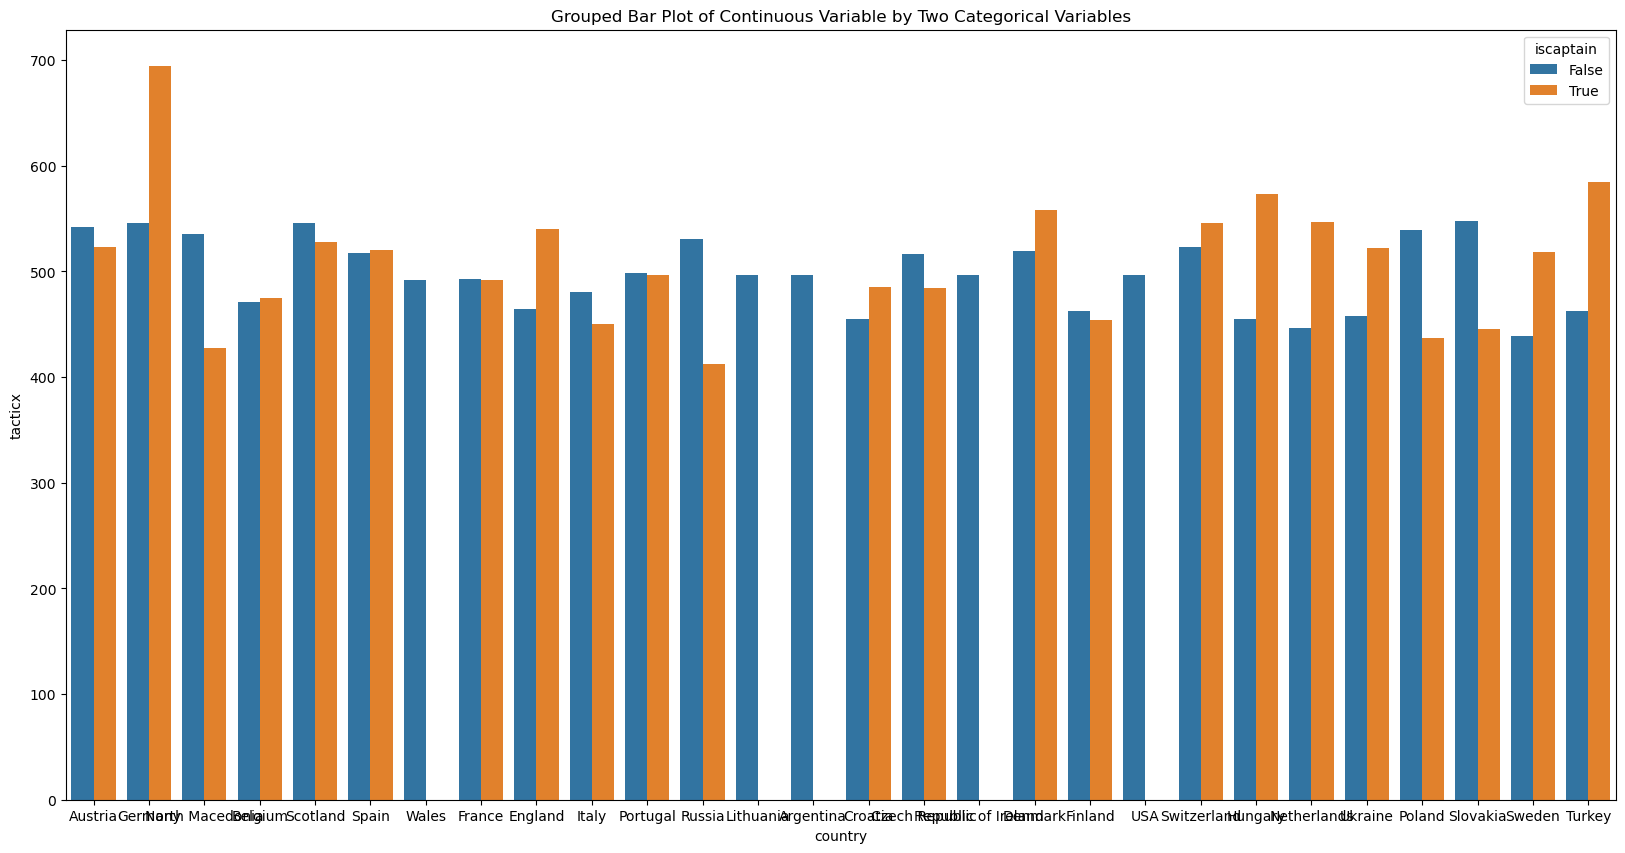

In [27]:
plt.figure(figsize=(20, 10))
sns.barplot(x='country', y='tacticx', hue='iscaptain', data=new_df, errorbar=None)
plt.title('Grouped Bar Plot of Continuous Variable by Two Categorical Variables')
plt.xlabel('country')
plt.ylabel('tacticx')
plt.legend(title='iscaptain')
plt.show()

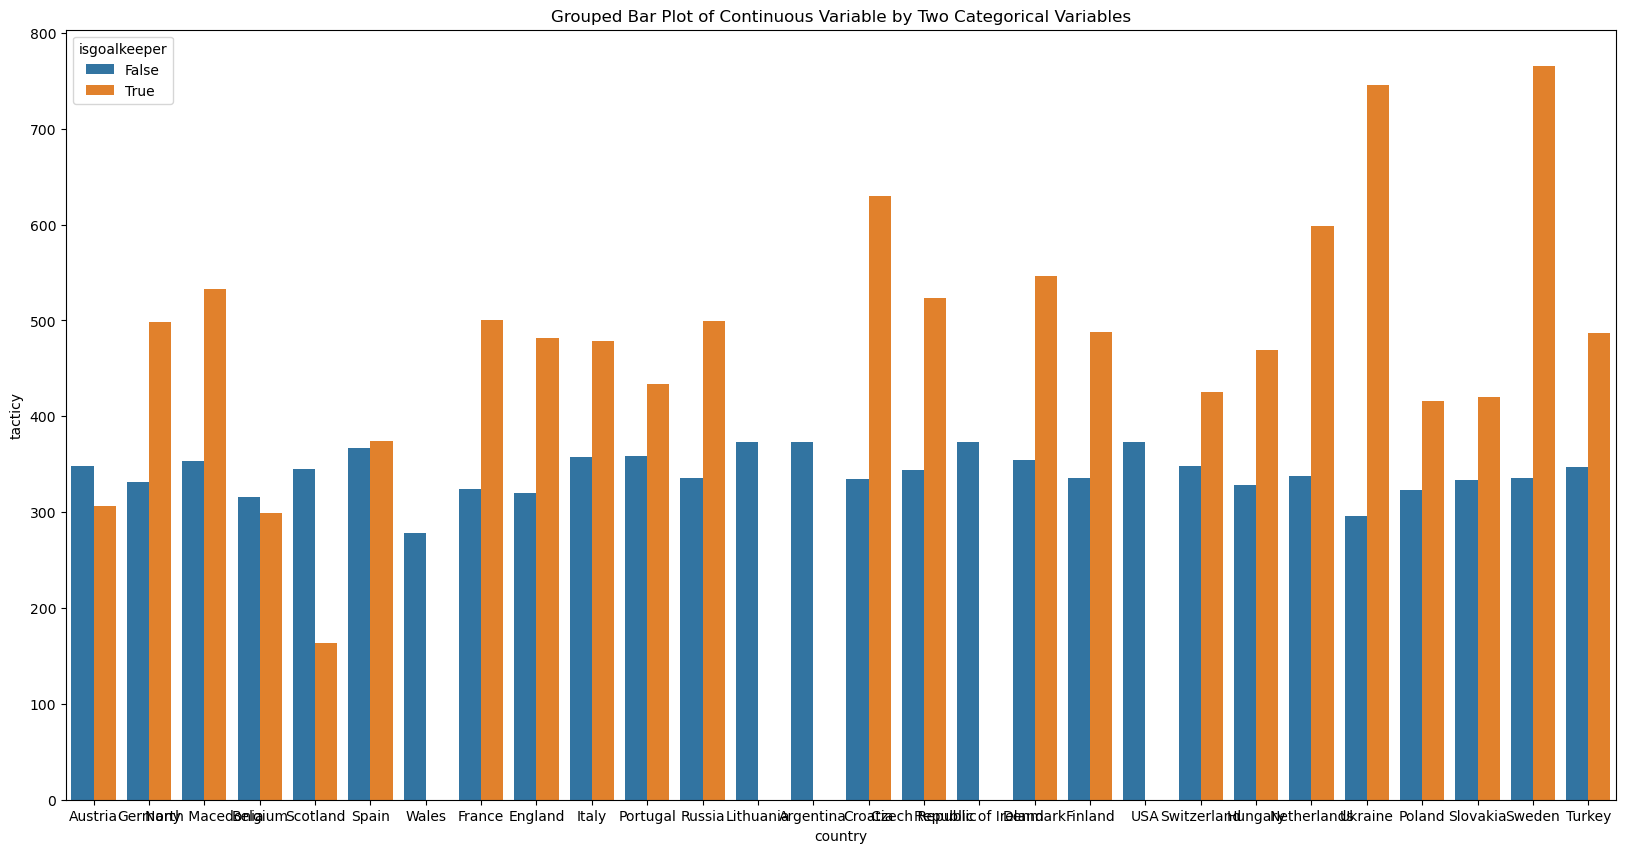

In [28]:
plt.figure(figsize=(20, 10))
sns.barplot(x='country', y='tacticy', hue='iscaptain', data=new_df, errorbar=None)
plt.title('Grouped Bar Plot of Continuous Variable by Two Categorical Variables')
plt.xlabel('country')
plt.ylabel('tacticy')
plt.legend(title='isgoalkeeper')
plt.show()

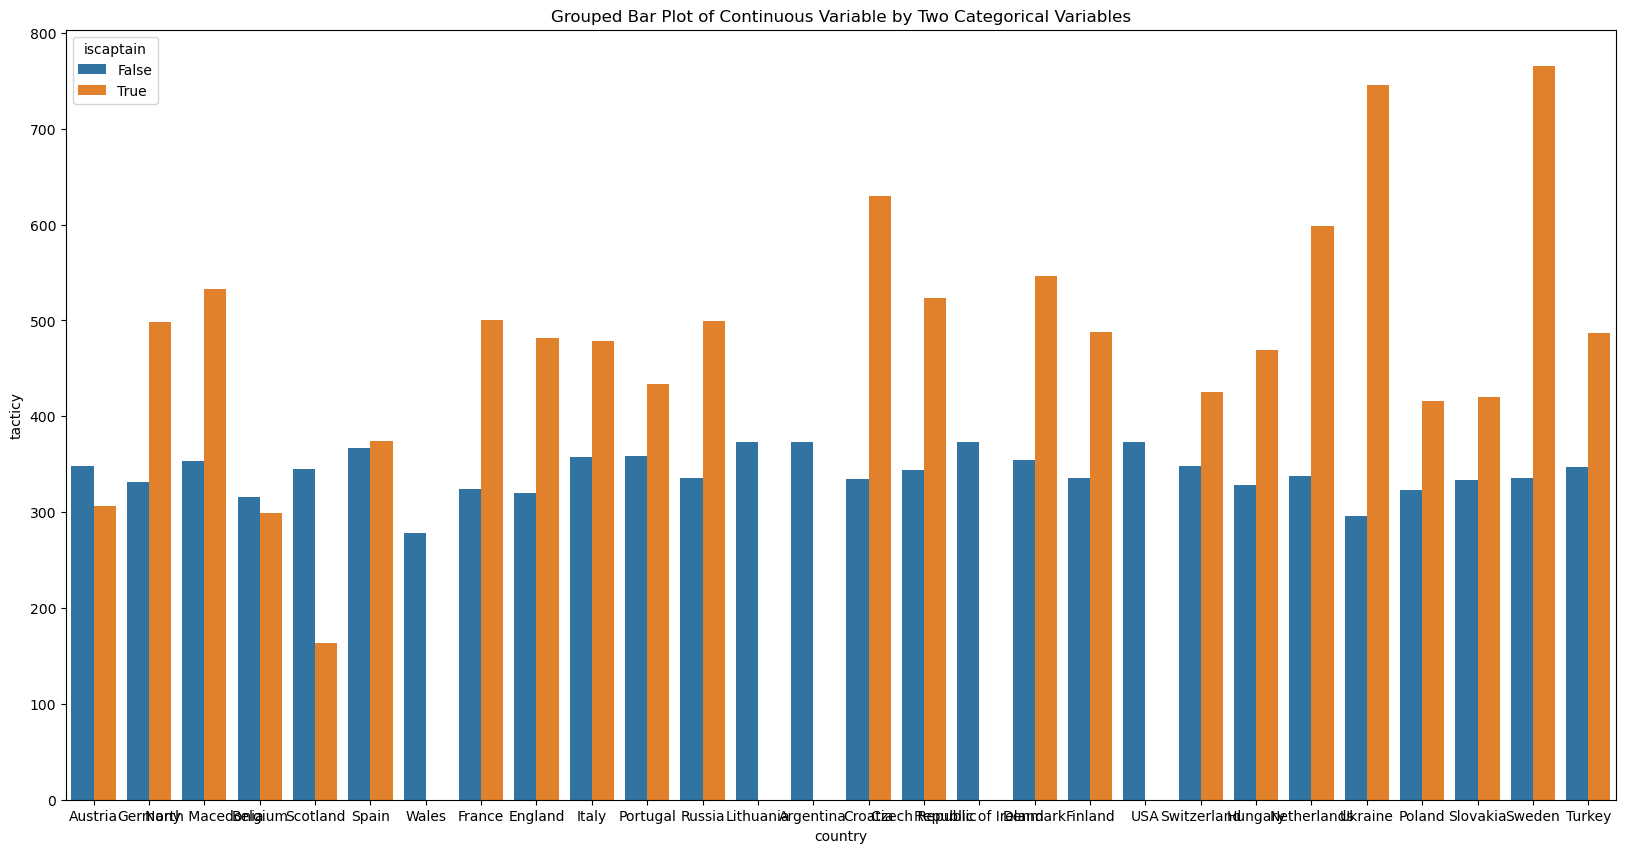

In [29]:
plt.figure(figsize=(20, 10))
sns.barplot(x='country', y='tacticy', hue='iscaptain', data=new_df, errorbar=None)
plt.title('Grouped Bar Plot of Continuous Variable by Two Categorical Variables')
plt.xlabel('country')
plt.ylabel('tacticy')
plt.legend(title='iscaptain')
plt.show()

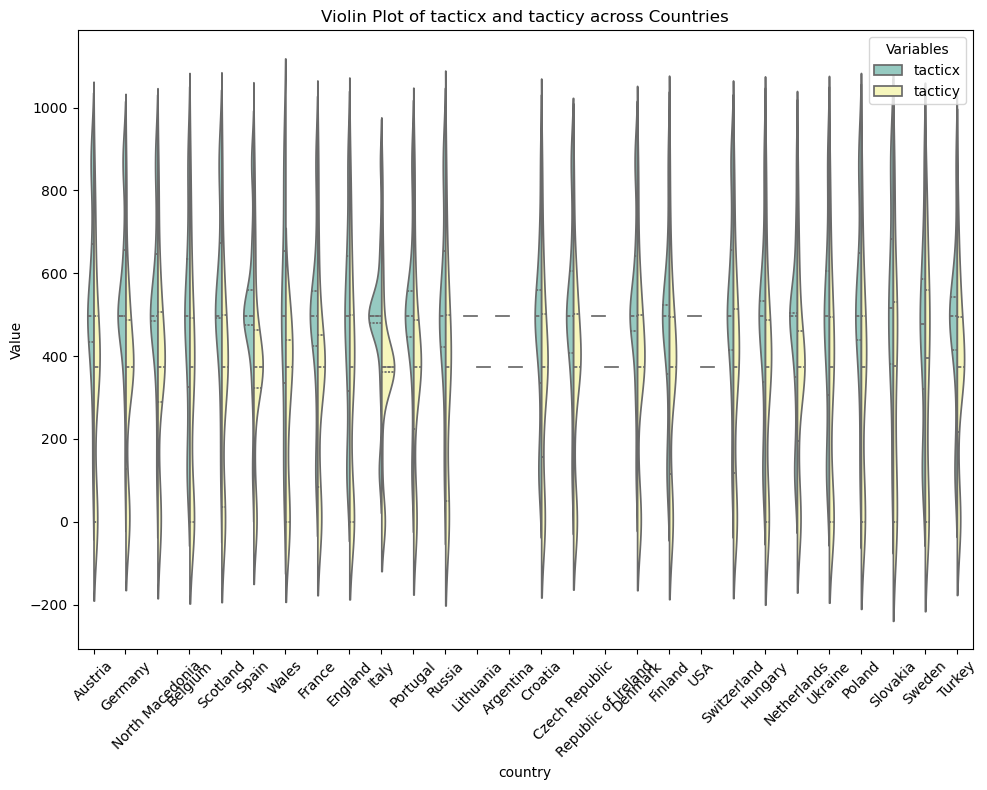

In [30]:
melted_new_df = pd.melt(new_df, id_vars=['country'], value_vars=['tacticx', 'tacticy'],
                        var_name='variable', value_name='Value')

# Plotting
plt.figure(figsize=(10,8))
sns.violinplot(x='country', y='Value', hue='variable', data=melted_new_df,
               split=True, inner='quartile', palette='Set3')
plt.title('Violin Plot of tacticx and tacticy across Countries')
plt.xlabel('country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Variables', loc='upper right')
plt.tight_layout()
plt.show()
plt.show()